In [139]:
#importing all the required libraries
from selenium import webdriver
from time import sleep
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [140]:
driver =  webdriver.Chrome(executable_path = r'C:\Users\dell\.wdm\drivers\chromedriver\win32\86.0.4240.22\chromedriver.exe')
#LOGIN INTO INSTAGRAM
driver.get('https://www.instagram.com/')
sleep(3)
name = driver.find_element_by_name('username')
myusername =  'gurrie.bhuller' 
name.send_keys(myusername)
pas = driver.find_element_by_name('password')
pas.send_keys('guri098@.')
login = driver.find_element_by_tag_name('button')
login.submit()
sleep(5)

In [143]:
#1.1  Open the first 10 handles you got after seatching food and find the top 5 which have the highest number of followers
search = driver.find_element_by_class_name('XTCLo')
search.send_keys('food') #typing food in search bar
sleep(1) 
f = []
food = driver.find_elements_by_class_name('Ap253') #names of handles
sleep(5)
for i in food: #saving all handles in a list
    f.append(i.get_attribute('innerHTML'))
handles = []
for i in f: #saving handles without hashtags 
    if i[0] != '#':
        handles.append(i)

d = {}
for i in range(10):
    driver.get('https://www.instagram.com/'+handles[i]) #opening handles
    p = handles[i] #p is name of current handle
    sleep(4)
    k=driver.find_elements_by_xpath('//ul[@class="k9GMp "]//span')[2] #getting no. of followers
    q = k.get_attribute('title')
    if q != '':
        q = q.replace(',', '')
        d[p] = int(float(q)) #storing followers as values and name of handle as keys in a dictionary d
di = dict(sorted(d.items(), key=lambda item: item[1], reverse = True)) #sorting the dictionary in descending order
first5 = [x for x in di][:5] #taking top 5 handles with more followers
follower = [di[x] for x in di][:5] #storing number of followers for later use
follower = follower[:5] #taking top 5
for i in first5:  #printing the reqd. handles
    print(i)


yourfoodlab
dilsefoodie
foodtalkindia
foodfoodtv
foodie_incarnate


In [148]:
#1.2 Now Find the number of posts these handles have done in the previous 3 days.
newd = {}
for i in range(5):
    driver.get('https://www.instagram.com/'+first5[i]) #searching for the top 5 handles from question 1.1
    sleep(2)
    driver.find_element_by_class_name('_9AhH0').click() #clicking on first post
    sleep(10)
    days = driver.find_element_by_class_name('_1o9PC').get_attribute('innerHTML').split()[0] #no. of days
    day = driver.find_element_by_class_name('_1o9PC').get_attribute('innerHTML').split()[1] #days or hours
    while True:
            if days.isalpha() != True:
                if (day == 'day' or day == 'days') and ( int(float(days))) <= 3: #if days are equal to or less than 3
                    newd[first5[i]] = newd.get(first5[i], 0) + 1 #add no. of posts to  dictionary having key the name of handle
                    driver.find_element_by_class_name('_65Bje').click() #clicking on next
                    sleep(3)
                    days = driver.find_element_by_class_name('_1o9PC').get_attribute('innerHTML').split()[0]
                    day = driver.find_element_by_class_name('_1o9PC').get_attribute('innerHTML').split()[1]

                elif (day == 'hour' or day == 'hours' or day=='minute' or day == 'minutes' or day =='second' or day=='seconds'): #if the user has posted only some hours ago (in range of 24 hours or 1 day) or sm minutes or  seconds ago
                    newd[first5[i]] = newd.get(first5[i], 0) + 1 
                    driver.find_element_by_class_name('_65Bje').click()
                    sleep(3)
                    days = driver.find_element_by_class_name('_1o9PC').get_attribute('innerHTML').split()[0]
                    day = driver.find_element_by_class_name('_1o9PC').get_attribute('innerHTML').split()[1]

                else: #if days are more than 3
                    break 
            else: #if some date is mentioned like previous month or even earlier
                break
names = [x for x in newd] #names of handles
posts = [newd[x] for x in newd] #no. of posts
for i in range(5):
    print(names[i], posts[i]) #printing name of handles with no. of posts

yourfoodlab 4
dilsefoodie 5
foodtalkindia 1
foodfoodtv 9
foodie_incarnate 7


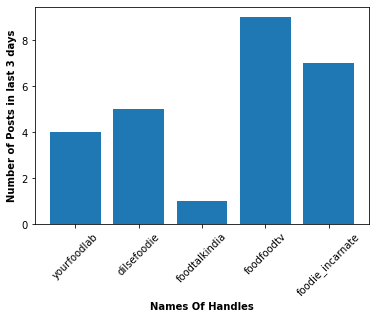

In [150]:
#1.3 Depict this information (names of top 5 handles and their no. of posts in 3 days) using a suitable graph.
plt.bar(names,  posts) #plotting bar graph
plt.xlabel('Names Of Handles', fontweight ='bold')
plt.ylabel('Number of Posts in last 3 days', fontweight ='bold')
plt.xticks(rotation=45)
plt.show()

In [153]:
#2.1 HASHTAGS- Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.
driver.get('https://www.instagram.com/') #going to main page
hashtags = [] 
for i in f: #storing names of handles which are hashtags
    if i[0] == '#':
        hashtags.append(i)
hashtags = hashtags[:5] #first 5 hashtags
hash =  []
for i in  range(5):
    driver.get('https://www.instagram.com/explore/tags/'+hashtags[i][1:]) #searching for hashtags
    sleep(2)
    driver.find_element_by_class_name('_9AhH0').click() #clicking on first post
    sleep(5)
    for s in range(9):
        o = driver.find_elements_by_class_name('xil3i') #all tags with the post
        for j in range(len(o)):
            hash.append(o[j].get_attribute('innerHTML')) #adding all tags to a list
        driver.find_element_by_class_name('_65Bje').click() #next
        sleep(3)
#print(hash) (if want to print)

['#lunch', '#easy', '#food', '#foodie', '#foodporn', '#foodstagram', '#foodblogger', '#foodlover', '#fit', '#fitgirl', '#fitstagram', '#fitfood', '#fitfoodie', '#fitness', '#fitnessmotivation', '#fitnessgirl', '#fitnessfood', '#fitfam', '#lean', '#absaremadeinthekitchen', '#cucinasana', '#ricettelight', '#diarioalimentare', '#love', '#meat', '#yummy', '#whatsonmyplate', '#vittypumbaa', '#italyfoodporn', '#italyfoodpornnapoli', '#italyfoodpornroma', '#food', '#foodporn', '#foodie', '#yummy', '#yummyfood', '#italian', '#italianfood', '#italianpasta', '#pasta', '#pastalover', '#cucinaitaliana', '#cucinaromana', '#ricetta', '#ricette', '#amatriciana', '#roma', '#rome', '#igersnapoli', '#igersroma', '#igersitalia', '#igdaily', '#picoftheday', '#jova_pizzefantastiche', '#pasta', '#orecchiette', '#pomodoro', '#pranzo', '#napoli', '#campania', '#frattamaggiore', '#puokemed', '#italyfoodporn', '#italyfoodpornnapoli', '#napolifoodporn', '#autunno', '#inverno', '#homemade', '#fattoincasa', '#past

In [159]:
#2.2 Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
freq = {}
for i in hash: #creating a dict and storing tags and their frequency as keys and values respectively
    freq[i] = freq.get(i, 0) + 1
hashnames = [i for i in freq] #hashtags
frequency = [freq[i] for i in freq] #their frequency
for i in freq:
    print(i,':', freq[i])

#lunch : 4
#easy : 2
#food : 19
#foodie : 20
#foodporn : 25
#foodstagram : 18
#foodblogger : 13
#foodlover : 13
#fit : 2
#fitgirl : 2
#fitstagram : 2
#fitfood : 2
#fitfoodie : 2
#fitness : 3
#fitnessmotivation : 3
#fitnessgirl : 2
#fitnessfood : 2
#fitfam : 2
#lean : 2
#absaremadeinthekitchen : 2
#cucinasana : 2
#ricettelight : 2
#diarioalimentare : 2
#love : 2
#meat : 3
#yummy : 7
#whatsonmyplate : 2
#vittypumbaa : 1
#italyfoodporn : 3
#italyfoodpornnapoli : 2
#italyfoodpornroma : 1
#yummyfood : 4
#italian : 2
#italianfood : 5
#italianpasta : 1
#pasta : 3
#pastalover : 4
#cucinaitaliana : 2
#cucinaromana : 1
#ricetta : 2
#ricette : 3
#amatriciana : 1
#roma : 2
#rome : 2
#igersnapoli : 1
#igersroma : 2
#igersitalia : 2
#igdaily : 2
#picoftheday : 2
#jova_pizzefantastiche : 1
#orecchiette : 1
#pomodoro : 1
#pranzo : 1
#napoli : 1
#campania : 1
#frattamaggiore : 1
#puokemed : 1
#napolifoodporn : 1
#autunno : 1
#inverno : 1
#homemade : 1
#fattoincasa : 1
#pastalove : 1
#pastalovers : 1
#f

In [160]:
#2.3 Create a csv file with two columns : the word and its frequency
new = {}
new['Word'] = hashnames #storing all hashtags names under 'Word'
new['Frequency'] = frequency #storing frequency of all hashtags  under 'Frequency'
df = pd.DataFrame(new) #storing data in dataframe
df.to_csv('Frequency.csv', index=False) #coonverting dataframe to csv file


In [161]:
#2.4 Now, find the hashtags that were most popular among these bloggers
popular = dict(sorted(d.items(), key=lambda item: item[1], reverse = True)) #sorted the hashtags acc to reverse order of their frequencies
mostpnames = [i for i in popular][:5] #top 5 hastags
number = [popular[i] for i in popular][:5] #frequency of top 5 hashtags
for i in range(5): #printing most popular hashtags
    print(mostpnames[i],':', number[i])

yourfoodlab : 1461956
dilsefoodie : 660155
foodtalkindia : 302781
foodfoodtv : 250274
foodie_incarnate : 231998


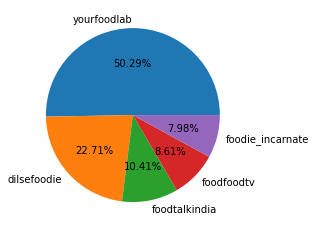

In [163]:
#2.5 Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.
plt.pie(number, labels= mostpnames, autopct = '%.2f%%')
plt.show()

In [179]:
#3.1 Find out the likes of the top 10 posts of the 5 handles obtained earlier.
like = {}
driver.get('https://www.instagram.com/') #going back to main page
wait = WebDriverWait(driver,20) #max wait declared
for i in range(5):
    driver.get('https://www.instagram.com/'+first5[i]) #searching first 5 handles obtained
    sleep(2)
    driver.find_element_by_class_name('_9AhH0').click() #clicking on first post
    wait.until(EC.presence_of_element_located((By.XPATH, '//div[@class= "PdwC2 fXiEu s2MYR"]'))) #waiting until the post is displayed
    try:
        
        likes = driver.find_element_by_xpath('//div[@class= "Nm9Fw"]/button/span') #getting number of likes
        print('Post  1  of ', first5[i],' has ',likes.get_attribute('innerHTML'), ' likes' ) #printing likes for first post
        like[first5[i]] = like.get(first5[i], 0) + int(float(likes.get_attribute('innerHTML').replace(',',''))) #storing number of  likes alongwith the handle name for later use
    except NoSuchElementException: #likes not shown case
            likes = driver.find_element_by_xpath('//div[@class="HbPOm _9Ytll"]/span[@class="vcOH2"]/span')
            print('Post  1  of ', first5[i],' has ',likes.get_attribute('innerHTML'), ' likes' ) #printing views if likes are not mentioned
            like[first5[i]] = like.get(first5[i], 0) + int(float(likes.get_attribute('innerHTML').replace(',','')))
    for s in range(9):
        driver.find_element_by_class_name('_65Bje').click() #next post
        sleep(5)
        try:
            likes = driver.find_element_by_xpath('//div[@class= "Nm9Fw"]/button/span')   #getting number of likes
            print('Post ', s+2,' of ', first5[i],' has ',likes.get_attribute('innerHTML'), ' likes' ) #printing likes
            like[first5[i]] = like.get(first5[i], 0) + int(float(likes.get_attribute('innerHTML').replace(',',''))) #storing number of  likes alongwith the handle name for later use
        except NoSuchElementException: #likes not shown case
            likes = driver.find_element_by_xpath('//div[@class="HbPOm _9Ytll"]/span[@class="vcOH2"]/span')
            print('Post ', s+2,' of ', first5[i],' has ',likes.get_attribute('innerHTML'), ' likes' ) #printing views if likes are not mentioned
            like[first5[i]] = like.get(first5[i], 0) + int(float(likes.get_attribute('innerHTML').replace(',',''))) #storing 

Post  1  of  yourfoodlab  have  235,149  likes
Post  2  of  yourfoodlab  have  28,788  likes
Post  3  of  yourfoodlab  have  28,934  likes
Post  4  of  yourfoodlab  have  92,558  likes
Post  5  of  yourfoodlab  have  127,875  likes
Post  6  of  yourfoodlab  have  29,806  likes
Post  7  of  yourfoodlab  have  15,293  likes
Post  8  of  yourfoodlab  have  6,662  likes
Post  9  of  yourfoodlab  have  237,942  likes
Post  10  of  yourfoodlab  have  55,092  likes
Post  1  of  dilsefoodie  have  57,250  likes
Post  2  of  dilsefoodie  have  71,559  likes
Post  3  of  dilsefoodie  have  70,658  likes
Post  4  of  dilsefoodie  have  64,675  likes
Post  5  of  dilsefoodie  have  54,203  likes
Post  6  of  dilsefoodie  have  65,857  likes
Post  7  of  dilsefoodie  have  151,866  likes
Post  8  of  dilsefoodie  have  190,893  likes
Post  9  of  dilsefoodie  have  115,375  likes
Post  10  of  dilsefoodie  have  36,726  likes
Post  1  of  foodtalkindia  have  417  likes
Post  2  of  foodtalkindia  

In [180]:
#3.2 Calculate the average likes for a handle.
averagelikes = [like[i]/10 for i in like] #avg likes = no. of likes/ no. of posts (which is 10 posts)
names = [i for i in like]
print('The average likes for each of the 5 handles are:')
for i in range(5):
    print(names[i], averagelikes[i])

The average likes for each of the 5 handles are:
yourfoodlab 85809.9
dilsefoodie 87906.2
foodtalkindia 1482.2
foodfoodtv 1909.4
foodie_incarnate 3986.8


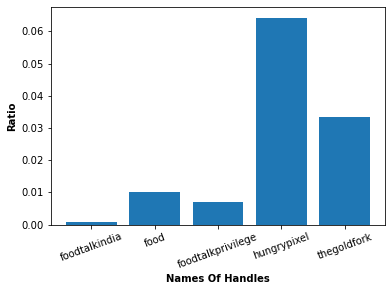

In [138]:
#3.3 Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.
avg = [averagelikes[i]/follower[i] for i in range(5)] #ratio = avglikes/ no. of followers
plt.bar(names,avg)
plt.xticks(rotation=20)
plt.xlabel('Names Of Handles', fontweight ='bold')
plt.ylabel('Ratio', fontweight ='bold')
plt.show()